# Obtaining our data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("/Users/kushal/Desktop/Diabetes Classification/Train.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,168,88,42,321,38.2,0.787,40,1
1,8,110,76,0,0,27.8,0.237,58,0
2,7,147,76,0,0,39.4,0.257,43,1
3,2,100,66,20,90,32.9,0.867,28,1
4,4,129,86,20,270,35.1,0.231,23,0


In [3]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               576 non-null    int64  
 1   Glucose                   576 non-null    int64  
 2   BloodPressure             576 non-null    int64  
 3   SkinThickness             576 non-null    int64  
 4   Insulin                   576 non-null    int64  
 5   BMI                       576 non-null    float64
 6   DiabetesPedigreeFunction  576 non-null    float64
 7   Age                       576 non-null    int64  
 8   Outcome                   576 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 40.6 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,576.0,3.758681,3.328783,0.000,1.00000,3.0000,6.00000,17.00
Glucose,576.0,119.975694,31.512914,0.000,99.00000,116.0000,139.00000,199.00
BloodPressure,576.0,68.826389,20.285812,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,576.0,20.364583,15.893856,0.000,0.00000,22.0000,32.00000,63.00
Insulin,576.0,76.166667,109.193550,0.000,0.00000,36.0000,120.00000,744.00
BMI,576.0,31.857292,8.134926,0.000,26.97500,32.0000,36.72500,67.10
DiabetesPedigreeFunction,576.0,0.481519,0.336910,0.078,0.24775,0.3815,0.64125,2.42
Age,576.0,32.954861,11.878137,21.000,24.00000,29.0000,40.00000,81.00
Outcome,576.0,0.348958,0.477055,0.000,0.00000,0.0000,1.00000,1.00


# Scrubbing/Cleaning our data

In [5]:
data_copy = data.copy(deep=True)
data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [6]:
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       3
BloodPressure                29
SkinThickness               171
Insulin                     278
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

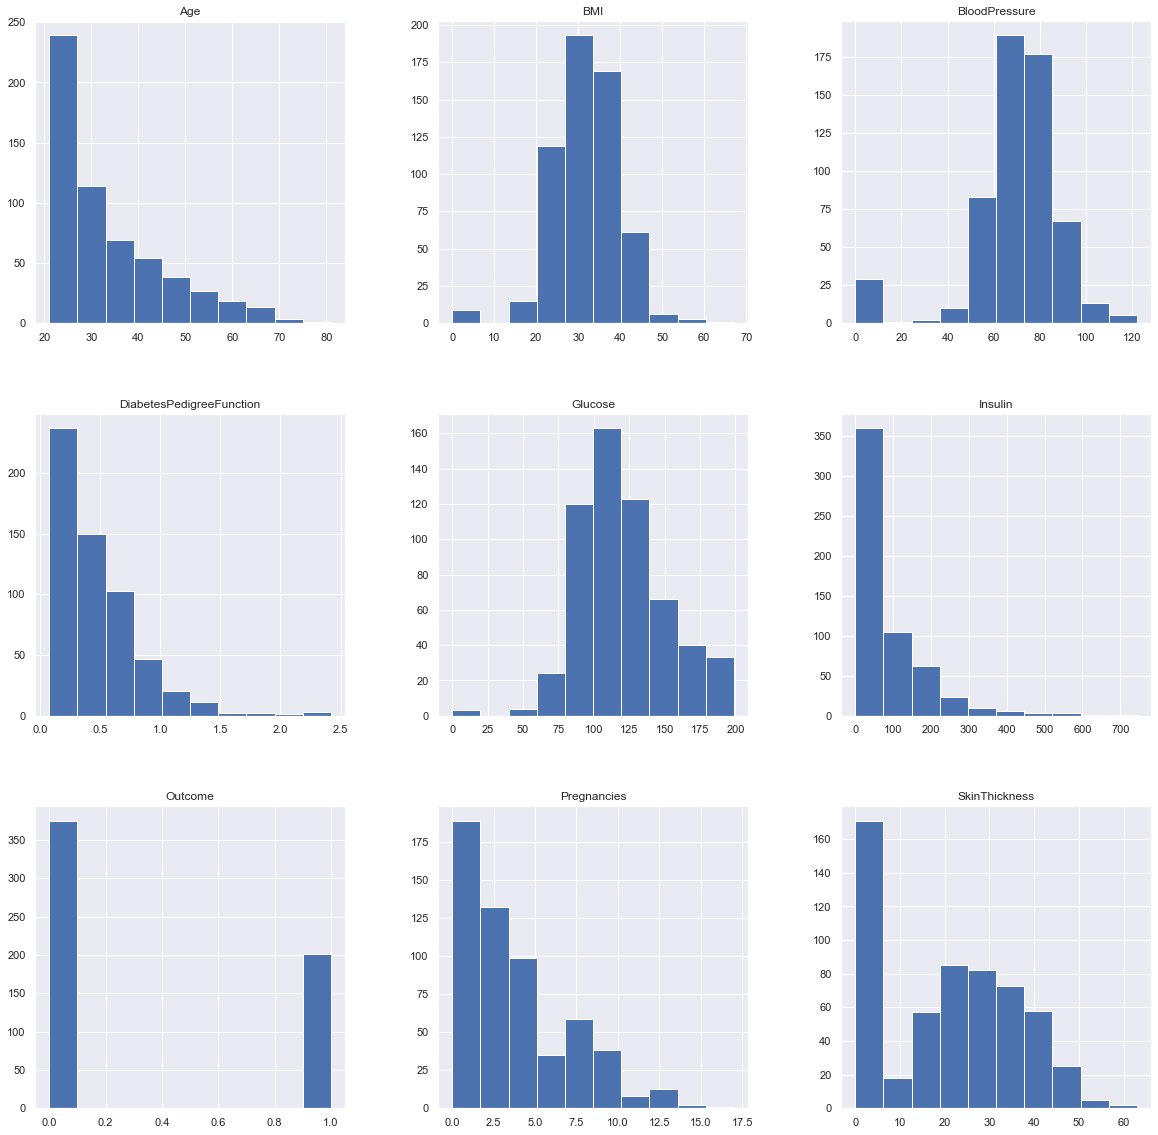

In [7]:
histogram = data.hist(figsize = (20, 20))

In [8]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace=True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace=True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace=True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace=True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace=True)

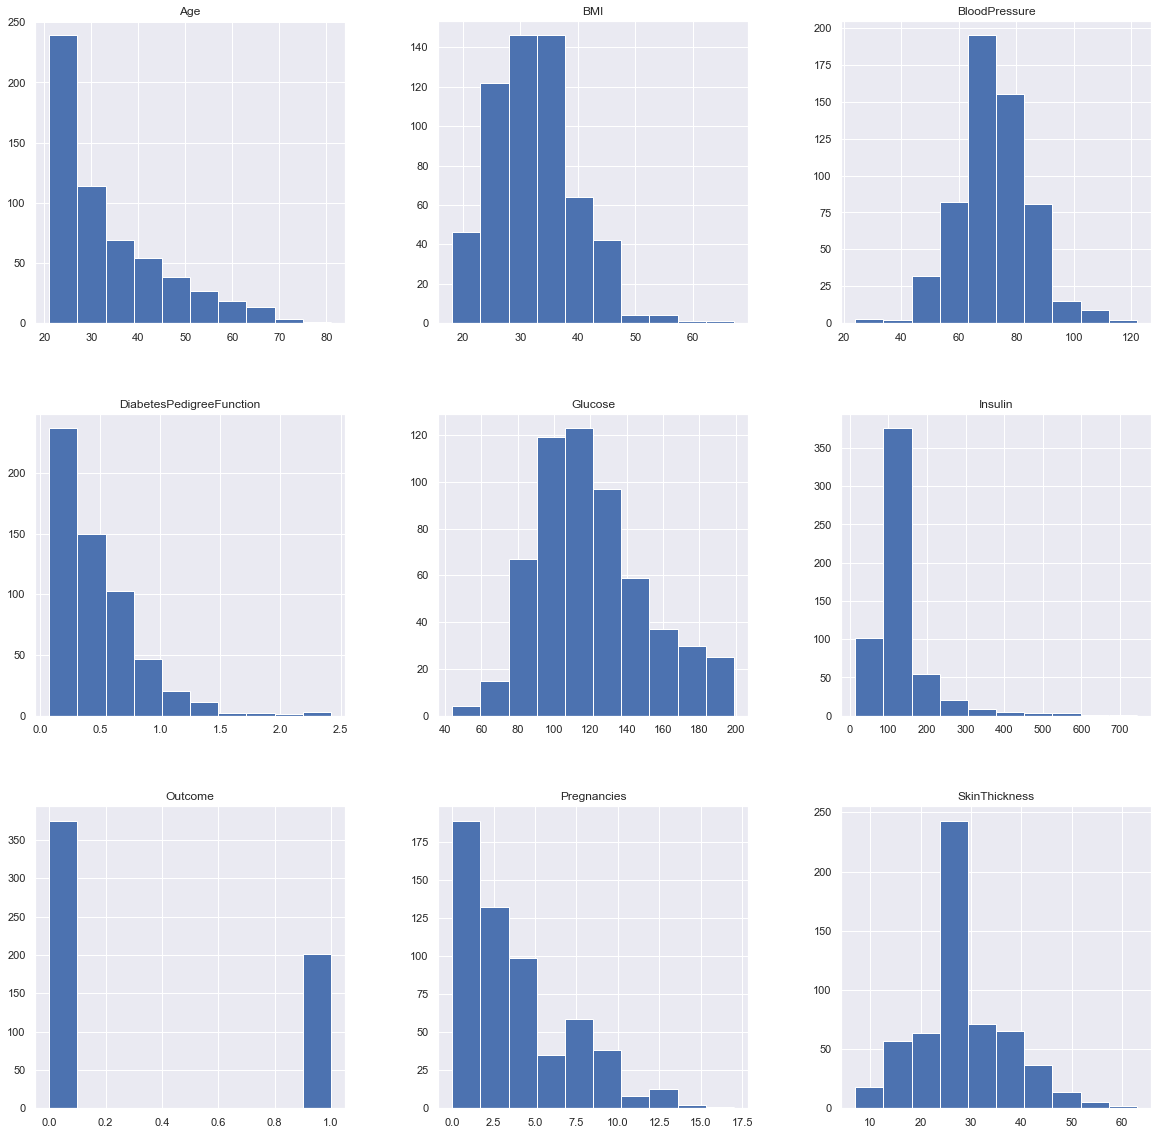

In [9]:
histogram = data_copy.hist(figsize = (20, 20))

In [10]:
data.shape

(576, 9)

# Exploring / Visualizing our data will allow us to find patterns and trends

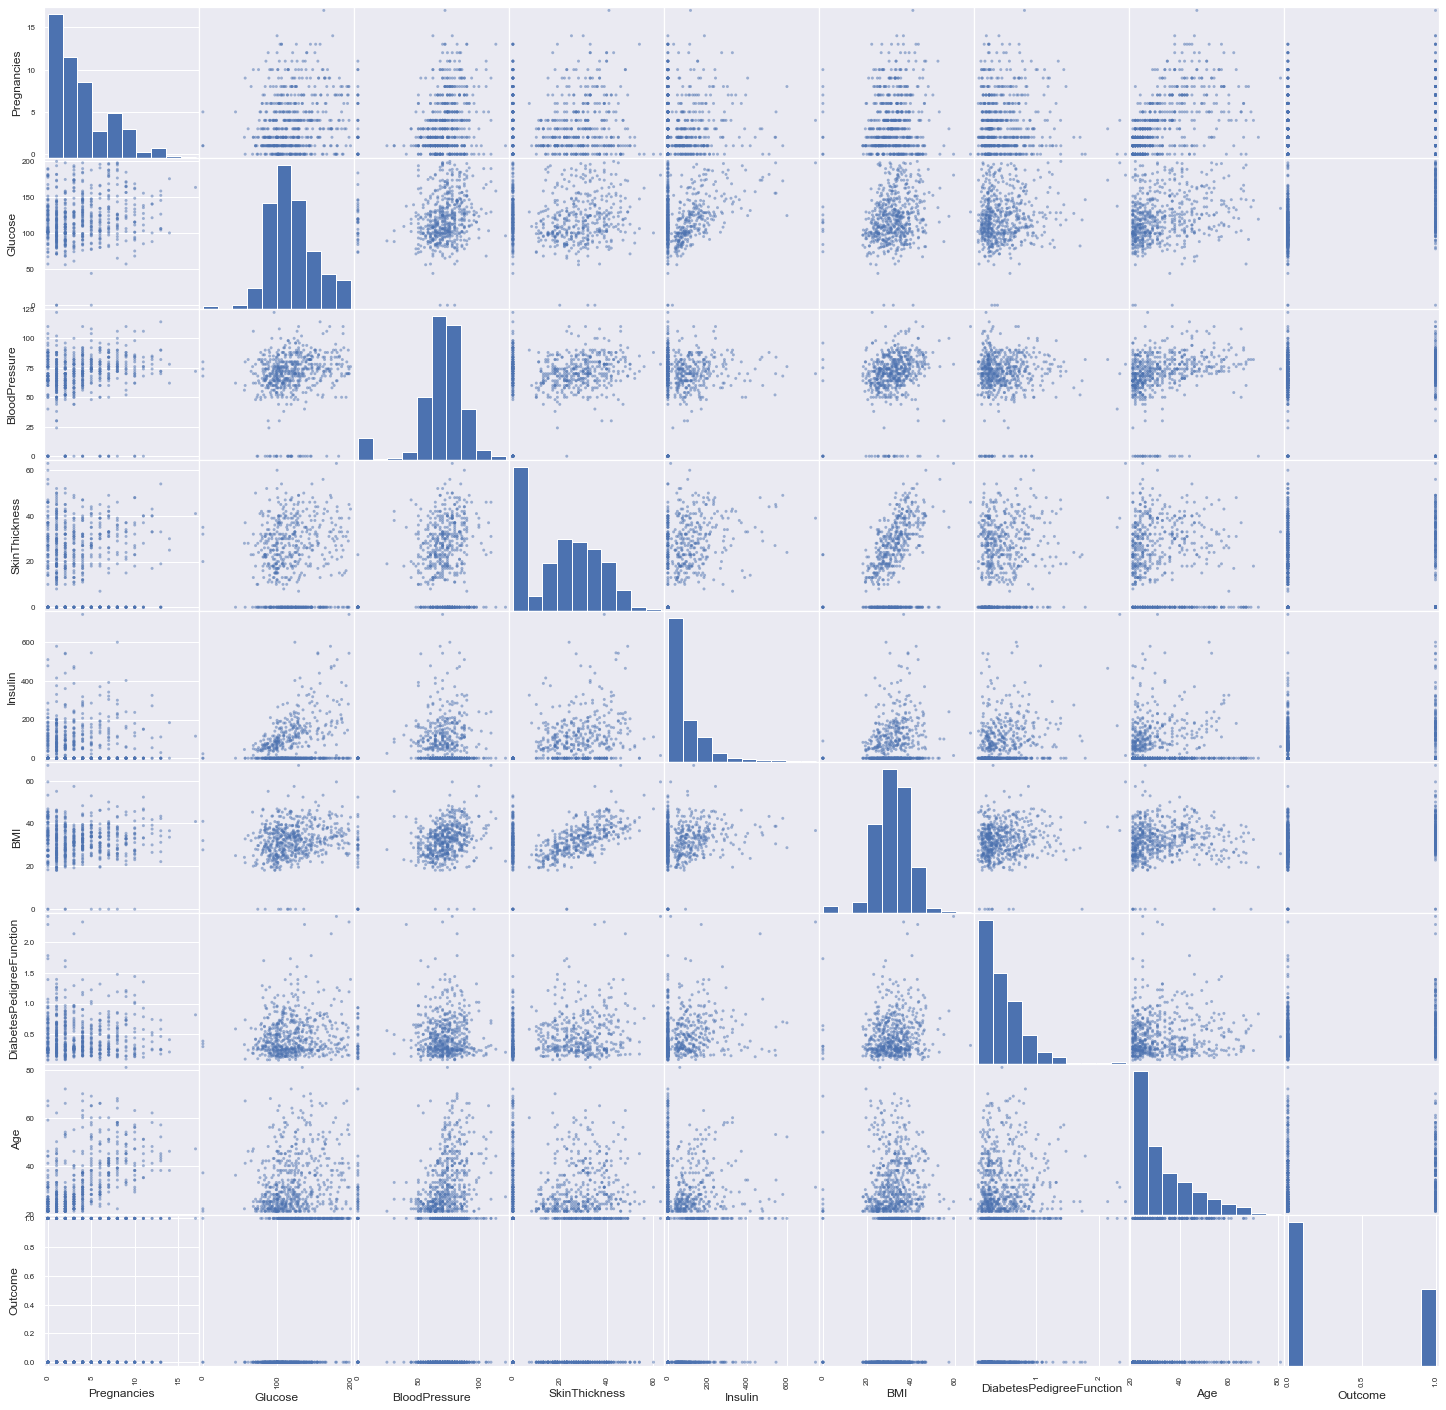

In [11]:
from pandas.plotting import scatter_matrix
plot = scatter_matrix(data, figsize=(25, 25))

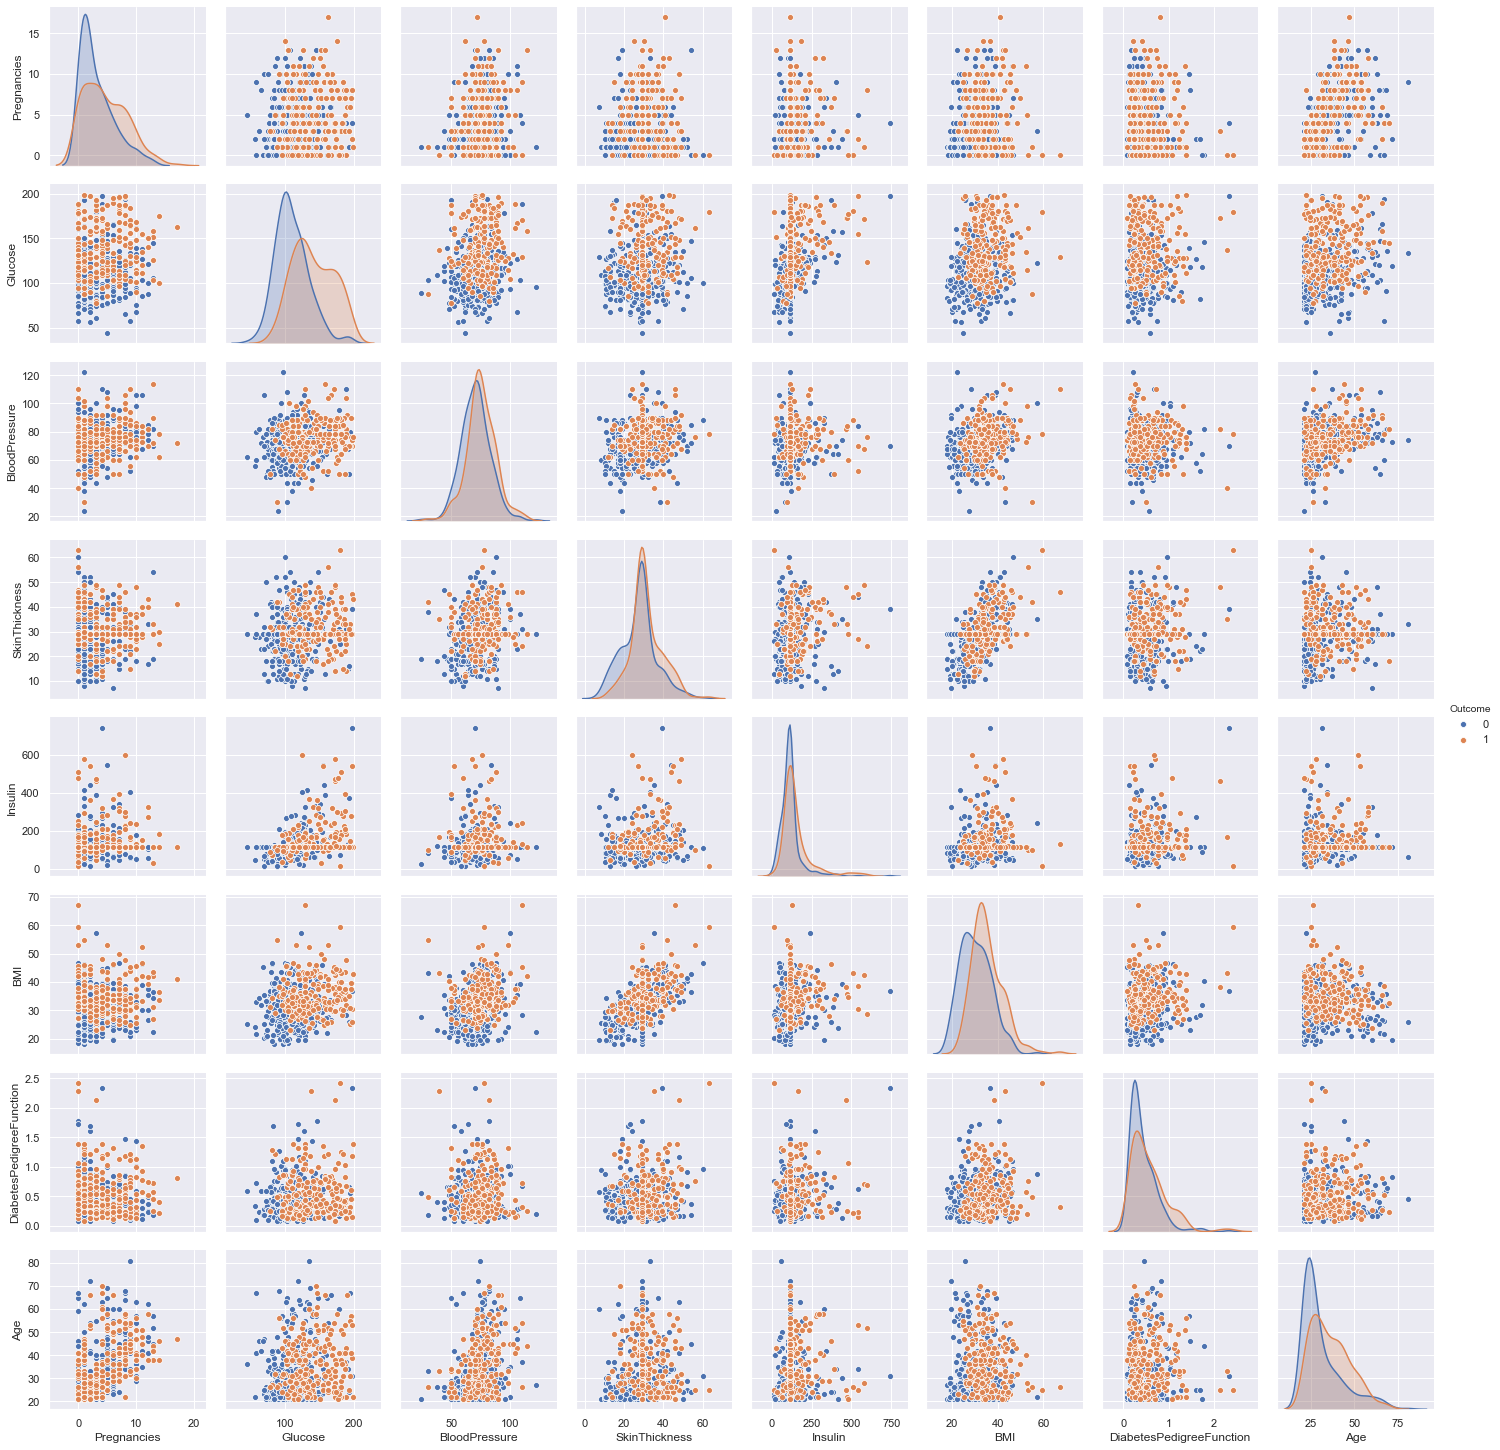

In [12]:
plot = sns.pairplot(data_copy, hue='Outcome')

# Modeling our data will give us our predictive power as a wizard

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [14]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.974572,1.566032,1.228651,1.483743,2.304490,0.826657,0.907501,0.593634
1,1.275243,-0.350365,0.278950,0.002966,-0.202906,-0.644790,-0.726400,2.110340
2,0.974572,0.872164,0.278950,0.002966,-0.202906,0.996439,-0.666985,0.846418
3,-0.528785,-0.680778,-0.512469,-1.022187,-0.507202,0.076785,1.145159,-0.417504
4,0.072558,0.277420,1.070368,-1.022187,1.683727,0.388053,-0.744224,-0.838811


In [15]:
y = data_copy.Outcome

# kNN starts here

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

In [17]:
from sklearn.neighbors import KNeighborsClassifier


train_scores = []
test_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [18]:
max_train_score = max(train_scores)
train_scores_ind = [i for i,v in enumerate(train_scores) if v==max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [19]:
max_test_score = max(test_scores)
test_scores_ind = [i for i,v in enumerate(test_scores) if v==max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100, list(map(lambda x: x+1, test_scores_ind))))

Max test score 75.0 % and k = [7, 14]


# Result Visualisation

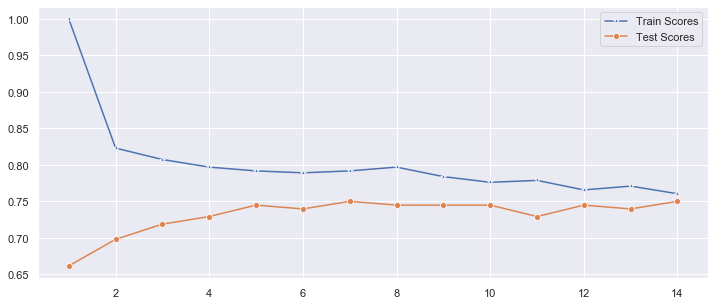

In [20]:
plt.figure(figsize = (12, 5))
plot = sns.lineplot(range(1, 15), train_scores, marker='*', label="Train Scores")
plot = sns.lineplot(range(1, 15), test_scores, marker='o', label="Test Scores")

In [21]:
knn = KNeighborsClassifier(14)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.75

In [22]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7639580209895052
Best Parameters: {'n_neighbors': 47}
